NATURE LANGUAGE
### 연습문제 1
- 초음파 Frequency로 광물-암석 예측하기
- 광물과 암석을 종속변수로 하는 pytest/sonar.csv 파일로 이진분류를 수행하시오
- 종속변수는 맨 우측 컬럼이며, 나머지는 모두 독립변수이다
- 훈련 데이터와 테스트 데이터로 구분하여 테스트 데이터 정확도를 구하시오
- 종속변수가 문자열임에 유의
- 최종 모델을 Best 모델로 간주하여, 최종 모델을 불러 예측하시오
    - (ModelCheckpoint를 사용하지 않음)
    - 독립변수: 60개. 각 특정 주파수 대의 누적 에너지
    - 종속변수: M-금속, R-암석

In [1]:
import os
import pandas as pd

path = 'D:\elice_python\GAS_5\pytest'

os.chdir(path)
os.getcwd()

'D:\\elice_python\\GAS_5\\pytest'

In [2]:
df = pd.read_csv('sonar.csv')
df.head(1)

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,Rock


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    float64
 18  attribute_19  208 non-null    

In [4]:
df.Class.unique()

array(['Rock', 'Mine'], dtype=object)

In [5]:
df.loc[df.Class == 'Rock', 'Class'] = 0
df.loc[df.Class == 'Mine', 'Class'] = 1

In [6]:
df.Class.unique()

array([0, 1], dtype=object)

In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1].astype('int32')

X.shape, y.shape

((208, 60), (208,))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state= 42)

In [18]:
from keras.models import  Sequential
from keras.layers import  Input, Dense

In [36]:
model = Sequential()
model.add(Input((60,)))
model.add(Dense(180, activation='relu', input_shape = (60,)))
model.add(Dense(90, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))



In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 180)               10980     
                                                                 
 dense_15 (Dense)            (None, 90)                16290     
                                                                 
 dense_16 (Dense)            (None, 30)                2730      
                                                                 
 dense_17 (Dense)            (None, 10)                310       
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 30,321
Trainable params: 30,321
Non-trainable params: 0
_________________________________________________________________


In [38]:
X_train.shape, y_train.shape

((156, 60), (156,))

In [39]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 156 entries, 47 to 61
Series name: Class
Non-Null Count  Dtype
--------------  -----
156 non-null    int32
dtypes: int32(1)
memory usage: 1.8 KB


In [40]:
model.compile(loss = 'binary_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=156,
                    validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 1s 713ms/step - loss: 0.6919 - acc: 0.5645 - val_loss: 0.6852 - val_acc: 0.6250
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 0.6878 - acc: 0.5081 - val_loss: 0.6789 - val_acc: 0.6875
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 0.6831 - acc: 0.5161 - val_loss: 0.6764 - val_acc: 0.6875
Epoch 4/100
1/1 [==============================] - 0s 72ms/step - loss: 0.6771 - acc: 0.5645 - val_loss: 0.6726 - val_acc: 0.6562
Epoch 5/100
1/1 [==============================] - 0s 61ms/step - loss: 0.6707 - acc: 0.5887 - val_loss: 0.6682 - val_acc: 0.7188
Epoch 6/100
1/1 [==============================] - 0s 51ms/step - loss: 0.6647 - acc: 0.6048 - val_loss: 0.6605 - val_acc: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 51ms/step - loss: 0.6586 - acc: 0.5645 - val_loss: 0.6538 - val_acc: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 50ms/step - loss: 0.6530 - acc: 0.6

In [41]:
model_dir = os.path.join(path,'models')
model_path = os.path.join(model_dir, 'sonar.h5')
model.save(model_path)


In [42]:
from tensorflow.keras.models import load_model
loaded_model = load_model(model_path)

In [43]:
evaluation = loaded_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.5715 - acc: 0.8269


In [44]:
evaluation

[0.5714920163154602, 0.8269230723381042]

### 2.
- credit_card_clients.xls 파일은 30,000개의 행과 24개의 속성을 가지고 있다
- 이중 default payment next month 컬럼이 종속변수로 연체일 경우 1, 정상납부일 경우 0이다
- pd.read_excel()로 읽고 연체 여부를 예측하는 모델을 만드시오
- 이전 모델보다 좋은 모델일 때만 저장하여 Best 모델을 불러 예측하시오
- 훈련데이터와 validation 데이터에 대한 정확도 및 손실값 그래프를 그리시오

In [50]:
df = pd.read_csv('credit_card_clients.csv', header=1)
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [53]:
df.iloc[:,-1].unique()

array([1, 0], dtype=int64)

In [54]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

In [55]:
from keras.models import Sequential
from keras.layers import  Input, Dense

In [59]:
model = Sequential()
model.add(Input((24,)))
model.add(Dense(72, activation='relu', input_shape = (25,)))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [60]:
model.compile(loss = 'binary_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

In [64]:
modelpath = os.path.join(model_dir, 'credit_{epoch:d}-{val_loss:.4f}.keras')
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(
    filepath=modelpath,  
                               monitor = 'val_loss', 
                               verbose=1,
                               save_best_only = True
                               )

history = model.fit(X_train, y_train, 
          epochs=200, 
          batch_size=1024, 
          validation_split=0.2, 
          verbose=1,
          callbacks = [checkpointer]
          )

Epoch 1/200
17/18 [===========================>..] - ETA: 0s - loss: 3.6348 - acc: 0.7163
Epoch 1: val_loss improved from inf to 6.43256, saving model to D:\elice_python\GAS_5\pytest\models\credit_1-6.4326.keras
18/18 [==============================] - 0s 19ms/step - loss: 3.7245 - acc: 0.7103 - val_loss: 6.4326 - val_acc: 0.7604
Epoch 2/200
10/18 [===============>..............] - ETA: 0s - loss: 4.6872 - acc: 0.7203
Epoch 2: val_loss improved from 6.43256 to 5.90249, saving model to D:\elice_python\GAS_5\pytest\models\credit_2-5.9025.keras
18/18 [==============================] - 0s 11ms/step - loss: 5.1265 - acc: 0.7146 - val_loss: 5.9025 - val_acc: 0.7589
Epoch 3/200
17/18 [===========================>..] - ETA: 0s - loss: 5.8844 - acc: 0.7016
Epoch 3: val_loss did not improve from 5.90249
18/18 [==============================] - 0s 10ms/step - loss: 5.9758 - acc: 0.7043 - val_loss: 8.4005 - val_acc: 0.7633
Epoch 4/200
10/18 [===============>..............] - ETA: 0s - loss: 4.8595

In [65]:
from tensorflow.keras.models import load_model
loaded_model = load_model(os.path.join(model_dir,'credit_165-0.6826.keras'))

In [66]:
evaluation = loaded_model.evaluate(X_test,y_test)

235/235 [==============================] - 1s 2ms/step - loss: 1.0510 - acc: 0.7695


In [67]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

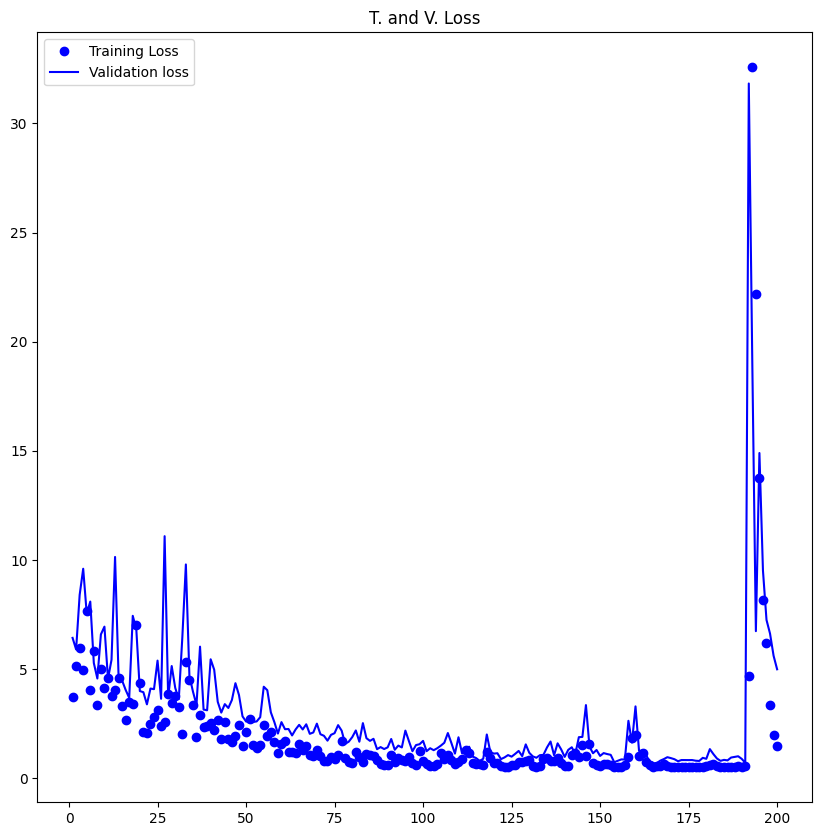

In [71]:
import matplotlib.pyplot as plt
epochs = range(1,len(acc)+1)
plt.figure(figsize=(10,10))
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('T. and V. Loss')
plt.legend()
plt.show()

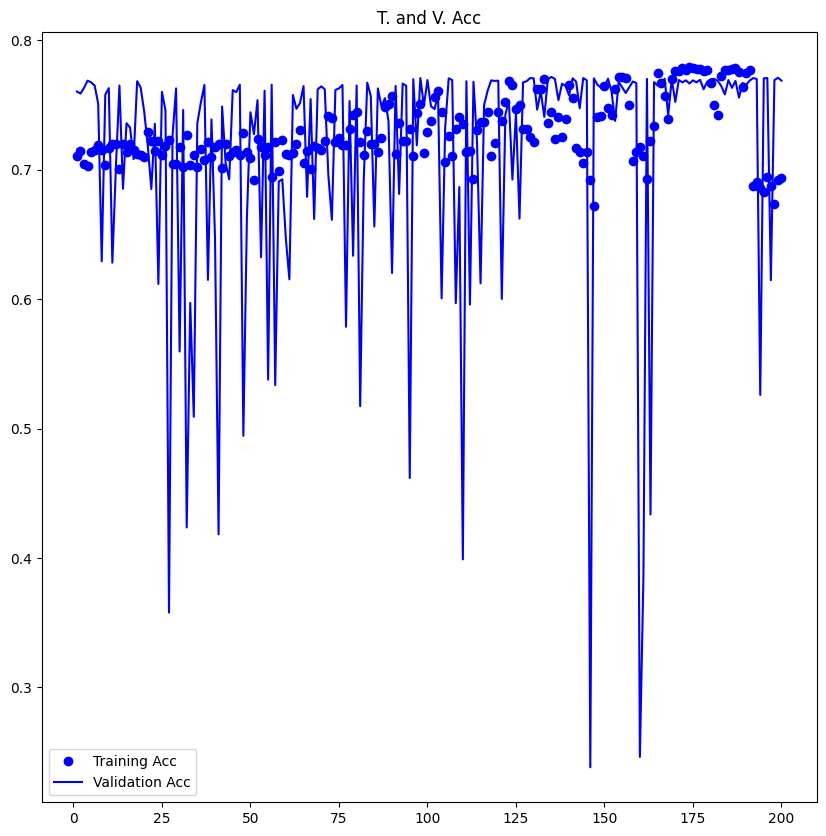

In [72]:
import matplotlib.pyplot as plt
epochs = range(1,len(acc)+1)
plt.figure(figsize=(10,10))
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('T. and V. Acc')
plt.legend()
plt.show()

### 3.

In [74]:
import os
import pandas as pd

path = 'D:\\elice_python\\GAS_5\\pytest\\datasets\\bike_sharing'
os.chdir(path)
os.getcwd()

'D:\\elice_python\\GAS_5\\pytest\\datasets\\bike_sharing'

In [76]:
df = pd.read_csv('bike_train.csv')
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [78]:
df.datetime = pd.to_datetime(df.datetime)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [84]:
df.datetime[1]

Timestamp('2011-01-01 01:00:00')

In [85]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  hour        10886 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(8)
memory usage: 1.1

#### except-one-hot

In [177]:
y = df['count'].astype('float64')
X = df[['workingday','temp','humidity','windspeed','weather','hour']]
X = pd.get_dummies(X, columns=['workingday', 'weather'], drop_first=False, dtype='int32')
X.shape, y.shape

((10886, 10), (10886,))

In [178]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          10886 non-null  float64
 1   humidity      10886 non-null  int64  
 2   windspeed     10886 non-null  float64
 3   hour          10886 non-null  int32  
 4   workingday_0  10886 non-null  int32  
 5   workingday_1  10886 non-null  int32  
 6   weather_1     10886 non-null  int32  
 7   weather_2     10886 non-null  int32  
 8   weather_3     10886 non-null  int32  
 9   weather_4     10886 non-null  int32  
dtypes: float64(2), int32(7), int64(1)
memory usage: 552.9 KB


In [179]:
y.head(2)

0    16.0
1    40.0
Name: count, dtype: float64

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1111)

In [181]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [182]:
model = Sequential()
model.add(Input((10,)))
model.add(Dense(24, activation = 'relu', input_shape = (10,)))
model.add(Dense(48, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(18, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))


In [183]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 24)                264       
                                                                 
 dense_82 (Dense)            (None, 48)                1200      
                                                                 
 dense_83 (Dense)            (None, 32)                1568      
                                                                 
 dense_84 (Dense)            (None, 18)                594       
                                                                 
 dense_85 (Dense)            (None, 8)                 152       
                                                                 
 dense_86 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,787
Trainable params: 3,787
Non-train

In [184]:
import keras.backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# 모델 컴파일 시 사용자 정의 손실 함수 사용
model.compile(optimizer='adam', loss=rmse, metrics=['mae'])


In [185]:
modelpath = os.path.join(path, 'model', 'bike_best_model_oh.keras')
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(
    filepath=modelpath,  
                               monitor = 'val_loss', 
                               verbose=1,
                               save_best_only = True
                               )

history = model.fit(X_train, y_train, 
          epochs=400, 
          batch_size=1024, 
          validation_split=0.2, 
          verbose=1,
          callbacks = [checkpointer]
          )

Epoch 1/400


1/7 [===>..........................] - ETA: 3s - loss: 273.2574 - mae: 200.7406
Epoch 1: val_loss improved from inf to 252.42403, saving model to D:\elice_python\GAS_5\pytest\datasets\bike_sharing\model\bike_best_model_oh.keras
7/7 [==============================] - 1s 52ms/step - loss: 264.6993 - mae: 191.8085 - val_loss: 252.4240 - val_mae: 181.3561
Epoch 2/400
1/7 [===>..........................] - ETA: 0s - loss: 277.4428 - mae: 202.7895
Epoch 2: val_loss improved from 252.42403 to 250.96552, saving model to D:\elice_python\GAS_5\pytest\datasets\bike_sharing\model\bike_best_model_oh.keras
7/7 [==============================] - 0s 23ms/step - loss: 263.2358 - mae: 189.9137 - val_loss: 250.9655 - val_mae: 179.4754
Epoch 3/400
1/7 [===>..........................] - ETA: 0s - loss: 256.1992 - mae: 183.5211
Epoch 3: val_loss improved from 250.96552 to 248.78857, saving model to D:\elice_python\GAS_5\pytest\datasets\bike_sharing\model\bike_best_model_oh.keras
7/7 [=======================

In [147]:
from tensorflow.keras.models import load_model
loaded_model = load_model(os.path.join(path, 'model','bike_best_model.keras'), custom_objects={'rmse': rmse})

In [186]:
acc = history.history['mae']
loss = history.history['loss']
val_acc = history.history['val_mae']
val_loss = history.history['val_loss']

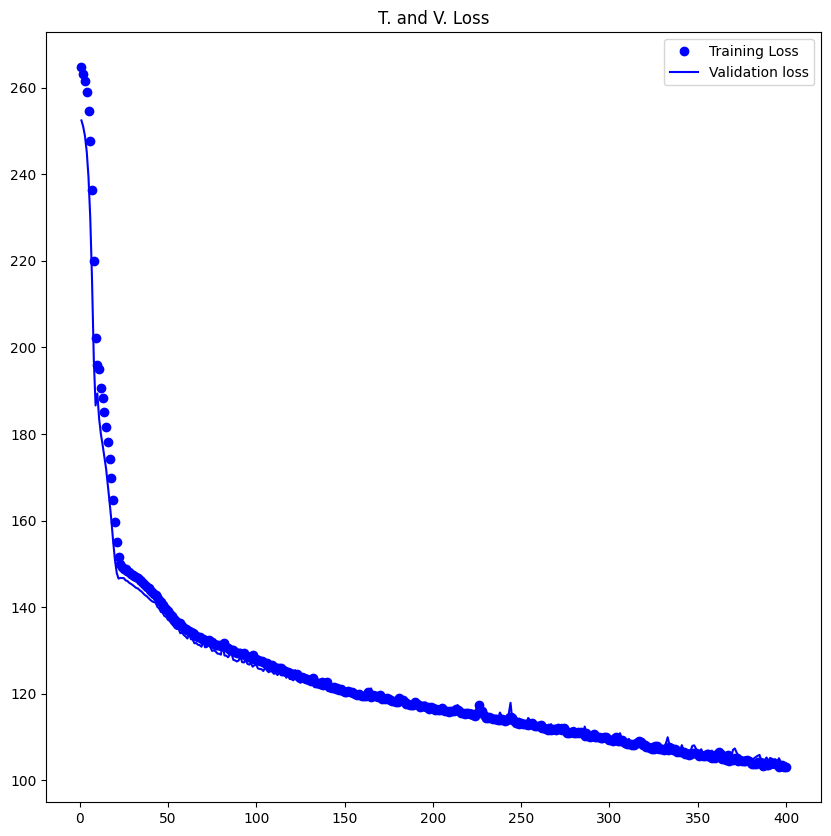

In [187]:
import matplotlib.pyplot as plt
epochs = range(1,len(acc)+1)
plt.figure(figsize=(10,10))
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('T. and V. Loss')
plt.legend()
plt.show()